In [1]:
import dart_fss as dart

# Open DART API KEY 설정
api_key='api_key'
dart.set_api_key(api_key=api_key)

# DART 에 공시된 회사 리스트 불러오기
corp_list = dart.get_corp_list()

# 대한항공 검색
kair = corp_list.find_by_corp_name('대한항공', exactly=True)[0]

# 2022년부터 연간 연결재무제표 불러오기
fs = kair.extract_fs(bgn_de='20220101')

# 재무제표 검색 결과를 엑셀파일로 저장 ( 기본저장위치: 실행폴더/fsdata )
fs.save()

Output()

Output()

Output()

Annual reports:   0%|          | 0/2 [00:00<?, ?report/s]

'C:\\Users\\user\\Documents\\빅데이터\\fsdata\\00113526_annual.xlsx'

In [2]:
import pandas as pd

In [3]:
kair

Label,Data
corp_code,00113526
corp_name,대한항공
stock_code,003490
modify_date,20221229
sector,항공 여객 운송업
product,"여객운송,화물운송,항공기 제조,판매,정비수리/기내식 제조판매,면세품 판매"
corp_cls,Y


In [4]:
# "항공 여객 운송업" 섹터 검색
corps = corp_list.find_by_sector(sector='항공 여객 운송업', market='YK')

In [5]:
corps

[[00653024]진에어,
 [00651901]에어부산,
 [00555874]제주항공,
 [00983040]한진칼,
 [00113526]대한항공,
 [00138792]아시아나항공,
 [00671376]티웨이항공]

In [8]:
air = corp_list.find_by_sector('항공 여객 운송업')

In [11]:
df_temp = pd.DataFrame()

for c in air:
    dict_temp = c.to_dict()
    df_temp2 = pd.DataFrame.from_dict(dict_temp, orient='index').T
    
    df_temp = pd.concat([df_temp, df_temp2])

In [12]:
df_temp

,corp_code,corp_name,stock_code,modify_date,sector,product,corp_cls
0,00653024,진에어,272450,20221205,항공 여객 운송업,"여객, 화물 등 항공운송",Y
0,00651901,에어부산,298690,20230103,항공 여객 운송업,항공 여객 및 화물 운송,Y
0,00555874,제주항공,089590,20221227,항공 여객 운송업,"여객운송서비스, 화물운송서비스",Y
0,00983040,한진칼,180640,20221229,항공 여객 운송업,"지주사업, 경영자문 및 컨설팅",Y
0,00113526,대한항공,003490,20221229,항공 여객 운송업,"여객운송,화물운송,항공기 제조,판매,정비수리/기내식 제조판매,면세품 판매",Y
0,00138792,아시아나항공,020560,20230403,항공 여객 운송업,"항공운송(여객운송,화물운송)/항공기 제조,정비수리",Y
0,00671376,티웨이항공,091810,20230403,항공 여객 운송업,저가 항공운송,Y


In [13]:
#교육지원 서비스업 대상 기업
air_list=corp_list.find_by_sector('항공 여객 운송업')
air_list

[[00653024]진에어,
 [00651901]에어부산,
 [00555874]제주항공,
 [00983040]한진칼,
 [00113526]대한항공,
 [00138792]아시아나항공,
 [00671376]티웨이항공]

In [14]:
find_list =[]

for e in air_list:
    find_list.append([e.corp_name,e.corp_code])

In [15]:
find_list

[['진에어', '00653024'],
 ['에어부산', '00651901'],
 ['제주항공', '00555874'],
 ['한진칼', '00983040'],
 ['대한항공', '00113526'],
 ['아시아나항공', '00138792'],
 ['티웨이항공', '00671376']]

In [16]:
air_df= pd.DataFrame()

In [17]:
for e in find_list:
    e_num = e[1]
    
    temp = dart.api.filings.get_corp_info(e_num)
    air_temp = pd.DataFrame.from_dict(temp, orient='index').T
    air_df = pd.concat([air_df, air_temp])


In [18]:
air_df

,status,message,corp_code,corp_name,corp_name_eng,stock_name,stock_code,ceo_nm,corp_cls,jurir_no,bizr_no,adres,hm_url,ir_url,phn_no,fax_no,induty_code,est_dt,acc_mt
0,000,정상,00653024,주식회사 진에어,"JIN AIR CO,.LTD.",진에어,272450,박병률,Y,1201110454976,1218189086,"서울특별시 강서구 공항대로 453, 3층",www.jinair.com,,1600-6200,02-3660-5998,511,20080123,12
0,000,정상,00651901,에어부산 주식회사,"Air Busan Co., Ltd",에어부산,298690,안병석,Y,1801110605121,6058184518,부산광역시 강서구 유통단지1로57번가길 6,www.airbusan.com,,1666-3060,051-410-0849,511,20070831,12
0,000,정상,00555874,(주)제주항공,"JEJUAIR, CO., LTD.",제주항공,089590,김이배,Y,2201110050575,6168150527,제주특별자치도 제주시 신대로 64 3층,www.jejuair.net,www.jejuair.net,070-7420-1986,02-2660-9707,511,20050125,12
0,000,정상,00983040,(주)한진칼,HANJINKAL,한진칼,180640,"조원태, 류경표",Y,1101115197193,2018634368,서울특별시 중구 서소문로 117 -,www.hanjinkal.co.kr,,02-726-6166,,511,20130801,12
0,000,정상,00113526,(주)대한항공,"KOREAN AIR LINES CO.,LTD",대한항공,003490,"조원태, 우기홍",Y,1101110108484,1108114794,서울특별시 강서구 하늘길 260,www.koreanair.com,,02-2656-7114,02-2656-8169,511,19620619,12
0,000,정상,00138792,아시아나항공(주),Asiana Airlines Inc.,아시아나항공,020560,원유석,Y,1101110562804,1048117480,서울특별시 강서구 오정로 443-83,www.flyasiana.com,,02-2669-3114,02-2127-8260,511,19880217,12
0,000,정상,00671376,(주)티웨이항공,"T'way Air Co., Ltd.",티웨이항공,091810,정홍근,Y,1101112782046,1018194800,대구광역시 중구 동덕로 167 케이티대구타워 신관 10층 (동인동2가),www.twayair.com,,02-6250-4984,02-6250-5999,511,20030701,12


In [19]:
air_df.columns

Index(['status', 'message', 'corp_code', 'corp_name', 'corp_name_eng',
       'stock_name', 'stock_code', 'ceo_nm', 'corp_cls', 'jurir_no', 'bizr_no',
       'adres', 'hm_url', 'ir_url', 'phn_no', 'fax_no', 'induty_code',
       'est_dt', 'acc_mt'],
      dtype='object')

In [20]:
col_name = pd.read_csv('./columns.csv', encoding='utf-8')

In [21]:
new_columns = []

for c in air_df.columns:
    try:
        m = col_name['응답키']== c
        new_c = col_name[m]['명칭'].iloc[0]
        new_columns.append(new_c)
    except:
        new_columns.append(c)


In [22]:
air_df.columns = new_columns

In [23]:
air_df

,에러 및 정보 코드,에러 및 정보 메시지,corp_code,정식명칭,영문명칭,종목명(상장사) 또는 약식명칭(기타법인),상장회사인 경우 주식의 종목코드,대표자명,법인구분,법인등록번호,사업자등록번호,주소,홈페이지,IR홈페이지,전화번호,팩스번호,업종코드,설립일(YYYYMMDD),결산월(MM)
0,000,정상,00653024,주식회사 진에어,"JIN AIR CO,.LTD.",진에어,272450,박병률,Y,1201110454976,1218189086,"서울특별시 강서구 공항대로 453, 3층",www.jinair.com,,1600-6200,02-3660-5998,511,20080123,12
0,000,정상,00651901,에어부산 주식회사,"Air Busan Co., Ltd",에어부산,298690,안병석,Y,1801110605121,6058184518,부산광역시 강서구 유통단지1로57번가길 6,www.airbusan.com,,1666-3060,051-410-0849,511,20070831,12
0,000,정상,00555874,(주)제주항공,"JEJUAIR, CO., LTD.",제주항공,089590,김이배,Y,2201110050575,6168150527,제주특별자치도 제주시 신대로 64 3층,www.jejuair.net,www.jejuair.net,070-7420-1986,02-2660-9707,511,20050125,12
0,000,정상,00983040,(주)한진칼,HANJINKAL,한진칼,180640,"조원태, 류경표",Y,1101115197193,2018634368,서울특별시 중구 서소문로 117 -,www.hanjinkal.co.kr,,02-726-6166,,511,20130801,12
0,000,정상,00113526,(주)대한항공,"KOREAN AIR LINES CO.,LTD",대한항공,003490,"조원태, 우기홍",Y,1101110108484,1108114794,서울특별시 강서구 하늘길 260,www.koreanair.com,,02-2656-7114,02-2656-8169,511,19620619,12
0,000,정상,00138792,아시아나항공(주),Asiana Airlines Inc.,아시아나항공,020560,원유석,Y,1101110562804,1048117480,서울특별시 강서구 오정로 443-83,www.flyasiana.com,,02-2669-3114,02-2127-8260,511,19880217,12
0,000,정상,00671376,(주)티웨이항공,"T'way Air Co., Ltd.",티웨이항공,091810,정홍근,Y,1101112782046,1018194800,대구광역시 중구 동덕로 167 케이티대구타워 신관 10층 (동인동2가),www.twayair.com,,02-6250-4984,02-6250-5999,511,20030701,12


In [24]:
air_df.columns

Index(['에러 및 정보 코드', '에러 및 정보 메시지', 'corp_code', '정식명칭', '영문명칭',
       '종목명(상장사) 또는 약식명칭(기타법인)', '상장회사인 경우 주식의 종목코드', '대표자명', '법인구분', '법인등록번호',
       '사업자등록번호', '주소', '홈페이지', 'IR홈페이지', '전화번호', '팩스번호', '업종코드',
       '설립일(YYYYMMDD)', '결산월(MM)'],
      dtype='object')

# 분석리포트
1. 매출과 비용 분석: 매출과 매출원가를 비교하여 매출총이익을 계산할 수 있습니다. 이를 통해 기업의 매출 활동이 얼마나 효율적으로 이루어지고 있는지를 파악할 수 있습니다.

2. 영업이익 분석: 영업이익과 판매비와 관리비를 비교하여 영업이익률을 계산할 수 있습니다. 이를 통해 기업의 영업 활동이 얼마나 수익성 있는지를 평가할 수 있습니다.

3. 총포괄이익 분석: 당기총포괄이익을 분석하여 기업의 전반적인 수익 상황을 평가할 수 있습니다.

이러한 분석을 통해 기업의 재무 상태 및 경영 성과를 ganz을 파악할 수 있습니다. 분석 결과를 차트나 그래프로 시각화하여 보고서에 포함시키면 더욱 명확하게 전달될 수 있습니다.

In [25]:
#대한한공 kair
#재무 정보 조회

kair = corp_list.find_by_corp_code('00113526')
kreports = kair.search_filings(bgn_de='20180101', pblntf_detail_ty='a001')
kreport = kreports[0]
xbrl = kreport.xbrl

xbrl.get_income_statement()[0].to_DataFrame()

# 대한항공의 포괄손익계산서 정보 가져오기
kincome_statement_df = xbrl.get_income_statement()[0].to_DataFrame()


Output()

Output()

In [26]:
kincome_statement_df

[D431410] Statement of comprehensive income, by function of expense - Consolidated financial statements (Unit: KRW)  \
                                                                                                            concept_id   
0                                   ifrs-full_Revenue                                                                    
1                               ifrs-full_CostOfSales                                                                    
2                               ifrs-full_GrossProfit                                                                    
3      dart_TotalSellingGeneralAdministrativeExpenses                                                                    
4                            dart_OperatingIncomeLoss                                                                    
5                             ifrs-full_FinanceIncome                                                                    
6                              ifrs-full_FinanceCosts                                                                    
7   entity00113526_udf_IS_20171169950179_Statement...                                                                    
8                                     dart_OtherGains                                                                    
9                                    dart_OtherLosses                                                                    
10                      ifrs-full_ProfitLossBeforeTax                                                                    
11     ifrs-full_IncomeTaxExpenseContinuingOperations                                                                    
12       ifrs-full_ProfitLossFromContinuingOperations                                                                    
13     ifrs-full_ProfitLossFromDiscontinuedOperations                                                                    
14                               ifrs-full_ProfitLoss                                                                    
15                 ifrs-full_OtherComprehensiveIncome                                                                    
16  dart_OtherComprehensiveIncomeThatWillNotBeRecl...                                                                    
17  dart_OtherComprehensiveIncomeNetOfTaxGainsLoss...                                                                    
18  entity00113526_udf_IS_201859195235323_OtherCom...                                                                    
19  ifrs-full_OtherComprehensiveIncomeNetOfTaxGain...                                                                    
20  dart_OtherComprehensiveIncomeThatWillBeReclass...                                                                    
21  dart_ShareOfOtherComprehensiveIncomeOfAssociat...                                                                    
22  ifrs-full_GainsLossesOnExchangeDifferencesOnTr...                                                                    
23                      ifrs-full_ComprehensiveIncome                                                                    
24   ifrs-full_ProfitLossAttributableToOwnersOfParent                                                                    
25  ifrs-full_ProfitLossAttributableToNoncontrolli...                                                                    
26  ifrs-full_ComprehensiveIncomeAttributableToOwn...                                                                    
27  ifrs-full_ComprehensiveIncomeAttributableToNon...                                                                    
28                ifrs-full_BasicEarningsLossPerShare                                                                    
29  ifrs-full_BasicEarningsLossPerShareFromContinu...                                                                    
30  entity00113526_udf_IS_202186101838815_BasicEar...                                              

In [27]:
# DataFrame 출력
print(kincome_statement_df)

   [D431410] Statement of comprehensive income, by function of expense - Consolidated financial statements (Unit: KRW)  \
                                                                                                            concept_id   
0                                   ifrs-full_Revenue                                                                    
1                               ifrs-full_CostOfSales                                                                    
2                               ifrs-full_GrossProfit                                                                    
3      dart_TotalSellingGeneralAdministrativeExpenses                                                                    
4                            dart_OperatingIncomeLoss                                                                    
5                             ifrs-full_FinanceIncome                                                                    
6                       

35             4,451.0  


In [28]:
#데이터 전처리
import pandas as pd

# 주어진 데이터를 DataFrame으로 변환
data = {
    "concept_id": ["ifrs-full_Revenue", "ifrs-full_CostOfSales", "ifrs-full_GrossProfit", 
                    "dart_TotalSellingGeneralAdministrativeExpenses", "dart_OperatingIncomeLoss", 
                    "ifrs-full_FinanceIncome", "ifrs-full_FinanceCosts", 
                    "dart_OtherGains", "dart_OtherLosses", "ifrs-full_ProfitLossBeforeTax", 
                    "ifrs-full_IncomeTaxExpenseContinuingOperations", 
                    "ifrs-full_ProfitLossFromContinuingOperations", 
                    "ifrs-full_ProfitLossFromDiscontinuedOperations", "ifrs-full_ProfitLoss", 
                    "ifrs-full_OtherComprehensiveIncome", 
                    "dart_OtherComprehensiveIncomeThatWillNotBeReclassifiedToProfitOrLoss", 
                    "dart_OtherComprehensiveIncomeNetOfTaxGainsLossesOnRemeasuringDefinedBenefitPlans", 
                    "entity00113526_udf_IS_201859195235323_OtherComprehensiveIncome_FairValueChangesInFinancialAssetsMeasurementGainLoss", 
                    "ifrs-full_OtherComprehensiveIncomeNetOfTaxGainLossOnEquityInvestmentsMeasuredAtFairValueThroughOtherComprehensiveIncome", 
                    "dart_OtherComprehensiveIncomeThatWillBeReclassifiedToProfitOrLoss", 
                    "dart_ShareOfOtherComprehensiveIncomeOfAssociatesAccountedForUsingEquityMethodThatWillBeReclassifiedToProfitOrLoss", 
                    "ifrs-full_GainsLossesOnExchangeDifferencesOnTranslationOfForeignOperations", 
                    "ifrs-full_ComprehensiveIncome", 
                    "ifrs-full_ProfitLossAttributableToOwnersOfParent", 
                    "ifrs-full_ProfitLossAttributableToNoncontrollingInterests", 
                    "ifrs-full_ComprehensiveIncomeAttributableToOwnersOfParent", 
                    "ifrs-full_ComprehensiveIncomeAttributableToNoncontrollingInterests", 
                    "ifrs-full_BasicEarningsLossPerShare", 
                    "ifrs-full_BasicEarningsLossPerShareFromContinuingOperations", 
                    "entity00113526_udf_IS_202186101838815_BasicEarningsLossPerShareFromContinuingOperations", 
                    "ifrs-full_BasicEarningsLossPerShareFromDiscontinuedOperations", 
                    "entity00113526_udf_IS_202238153530736_BasicEarningsLossPerShareFromDiscontinuedOperations", 
                    "ifrs-full_DilutedEarningsLossPerShare", 
                    "ifrs-full_DilutedEarningsLossPerShareFromContinuingOperations", 
                    "ifrs-full_DilutedEarningsLossPerShareFromDiscontinuedOperations"],
    "label_ko": ["매출", "매출원가", "매출총이익", "판매비와관리비", "영업이익(손실)", "금융수익", "금융비용", 
                 "기타영업외수익", "기타영업외비용", "법인세비용차감전순이익(손실)", "법인세비용(수익)", 
                 "계속영업이익(손실)", "중단영업이익(손실)", "당기순이익(손실)", "기타포괄손익", 
                 "1. 후속적으로 당기손익으로 재분류되지 않는 항목", "순확정급여부채 재측정요소", 
                 "기타포괄손익-공정가치측정금융자산평가손익", "자산재평가잉여금", 
                 "2. 후속적으로 당기손익으로 재분류될 수 있는 항목", "(부의)지분법자본변동", 
                 "해외사업장환산손익", "당기총포괄이익(손실)", "지배기업의 소유주", "비지배지분", 
                 "지배기업의 소유주", "비지배지분", "보통주주당이익(손실)", "계속영업기본주당이익(손실)", 
                 "계속영업희석주당이익(손실)", "중단영업기본주당이익(손실)", "중단영업희석주당이익(손실)", 
                 "우선주주당이익(손실)", "계속영업기본및희석주당이익(손실)", "중단영업기본및희석주당이익(손실)"],
    "label_en": ["Revenue(Sales)", "Cost of sales", "Gross profit", 
                 "Selling general administrative expenses", "Operating income(loss)", "Finance income", 
                 "Finance costs", "Other gains", "Other losses", "Profit (loss) before tax", 
                 "Income tax expense", "Profit (loss) from continuing operations", 
                 "Profit (loss) from discontinued operations", "Profit (loss)", "Other comprehensive income", 
                 "Other comprehensive income that will not be reclassified to profit or loss", 
                 "Other comprehensive income, net of tax, gains losses on remeasuring defined benefit plans", 
                 "Other Comprehensive Income-Fair value measurement gain loss on financial assets", 
                 "Other comprehensive income, net of tax, gains losses on equity investments measured at fair value", 
                 "Other comprehensive income that will be reclassified to profit or loss", 
                 "Share of other comprehensive income of associates accounted for using equity method that will be reclassified to profit or loss", 
                 "Gains losses on exchange differences on translation of foreign operations", 
                 "Comprehensive income", "Profit (loss) attributable to owners of parent", 
                 "Profit (loss) attributable to noncontrolling interests", 
                 "Comprehensive income attributable to owners of parent", 
                 "Comprehensive income attributable to noncontrolling interests", 
                 "Basic earnings (loss) per share", "Basic earnings (loss) per share from continuing operations", 
                 "Basic earnings (loss) per share from continuing operations", 
                 "Basic earnings (loss) per share from discontinued operations", 
                 "Basic earnings (loss) per share from discontinued operations", 
                 "Diluted earnings (loss) per share", 
                 "Diluted earnings (loss) per share from continuing operations", 
                 "Diluted earnings (loss) per share from discontinued operations"]
}

# DataFrame 생성
df = pd.DataFrame(data)

# 필요한 열만 선택
df = df[["concept_id", "label_ko", "label_en"]]

# 데이터 형식 확인
print(df.info())

# 결측치 처리
print(df.isnull().sum())

# 데이터 시각화
import matplotlib.pyplot as plt

# 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic')

# 한글 폰트 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

# 레이블과 레이블 수 추출
labels = df['label_ko']
counts = df['concept_id'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   concept_id  35 non-null     object
 1   label_ko    35 non-null     object
 2   label_en    35 non-null     object
dtypes: object(3)
memory usage: 972.0+ bytes
None
concept_id    0
label_ko      0
label_en      0
dtype: int64


# 1. 매출과 비용 분석

In [29]:
import pandas as pd

# 데이터 프레임 생성
data = {
    'concept_id': ['ifrs-full_Revenue', 'ifrs-full_CostOfSales', 'ifrs-full_GrossProfit'],
    'label_ko': ['매출', '매출원가', '매출총이익'],
    '20220101-20221231': [13412724920861.0, 9594722293908.0, 3818002626953.0],
    '20210101-20211231': [14096094819146.0, 10245440430536.0, 3850654388610.0],
    '20200101-20201231': [9016824640301.0, 6912047063945.0, 2104777576356.0]
}

df = pd.DataFrame(data)

# 연도별 매출총이익 계산
df['매출총이익_2022'] = df['20220101-20221231'] - df['20210101-20211231']
df['매출총이익_2021'] = df['20210101-20211231'] - df['20200101-20201231']

# 결과 출력
print(df[['label_ko', '매출총이익_2022', '매출총이익_2021']])


  label_ko         매출총이익_2022          매출총이익_2021
0       매출 -683,369,898,285.0 5,079,270,178,845.0
1     매출원가 -650,718,136,628.0 3,333,393,366,591.0
2    매출총이익  -32,651,761,657.0 1,745,876,812,254.0


In [33]:
import pandas as pd

# 주어진 데이터를 DataFrame으로 변환
data = {
    'label_ko': ['매출', '매출원가', '매출총이익'],
    '매출총이익_2022': [-32651761657.0, -650718136628.0, -683369898285.0],
    '매출총이익_2021': [1745876812254.0, 3333393366591.0, 5079270178845.0]
}
df = pd.DataFrame(data)

# 매출과 비용 분석
매출_2021 = df[df['label_ko'] == '매출']['매출총이익_2021'].values[0]
매출_2022 = df[df['label_ko'] == '매출']['매출총이익_2022'].values[0]
매출증감 = 매출_2022 - 매출_2021

매출원가_2021 = df[df['label_ko'] == '매출원가']['매출총이익_2021'].values[0]
매출원가_2022 = df[df['label_ko'] == '매출원가']['매출총이익_2022'].values[0]
매출원가증감 = 매출원가_2022 - 매출원가_2021

매출총이익_2021 = df[df['label_ko'] == '매출총이익']['매출총이익_2021'].values[0]
매출총이익_2022 = df[df['label_ko'] == '매출총이익']['매출총이익_2022'].values[0]
매출총이익증감 = 매출총이익_2022 - 매출총이익_2021

print('매출 증감: {:,.0f}'.format(매출증감))
print('매출원가 증감: {:,.0f}'.format(매출원가증감))
print('매출총이익 증감: {:,.0f}'.format(매출총이익증감))


매출 증감: -1,778,528,573,911
매출원가 증감: -3,984,111,503,219
매출총이익 증감: -5,762,640,077,130


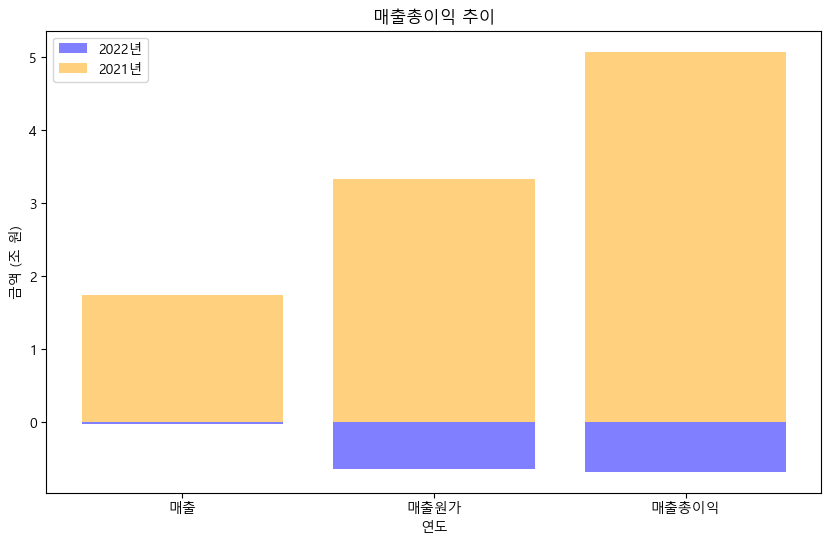

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# 데이터 생성
data = {
    'label_ko': ['매출', '매출원가', '매출총이익'],
    '매출총이익_2022': [-32651761657.0, -650718136628.0, -683369898285.0],
    '매출총이익_2021': [1745876812254.0, 3333393366591.0, 5079270178845.0]
}

df = pd.DataFrame(data)

# 그래프 생성
plt.figure(figsize=(10, 6))

# 그래프 제목 및 라벨 설정
plt.title('매출총이익 추이')
plt.xlabel('연도')
plt.ylabel('금액 (조 원)')  # y축 라벨 수정

# 천 단위로 쉼표를 추가하는 함수 정의
def comma(x, pos):
    return '{:,.0f}'.format(x / 10**12)  # 조 단위로 수정

formatter = FuncFormatter(comma)

# y축에 천 단위로 쉼표를 추가
plt.gca().yaxis.set_major_formatter(formatter)

# 막대 그래프 그리기
plt.bar(df['label_ko'], df['매출총이익_2022'], color='blue', alpha=0.5, label='2022년')
plt.bar(df['label_ko'], df['매출총이익_2021'], color='orange', alpha=0.5, label='2021년')

# 범례 추가
plt.legend()

# 폰트 설정
plt.rc('font', family='Malgun Gothic')  # 윈도우를 사용하고 있을 때

# 그래프 출력
plt.show()


# 2. 영업이익 분석

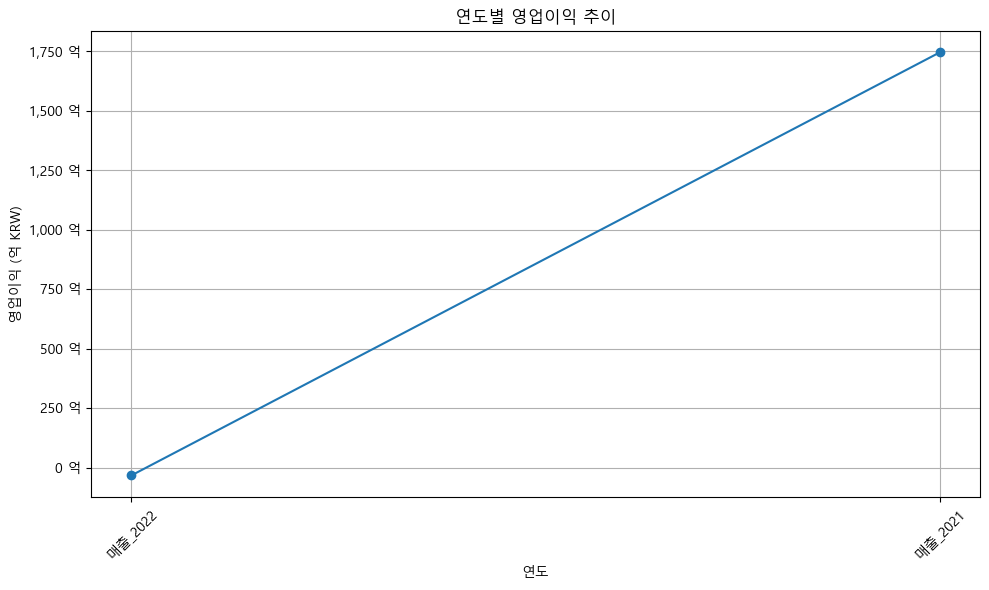

In [39]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.ticker as ticker

# 주어진 데이터
data = {
    'label_ko': ['매출', '매출원가', '영업이익'],
    '매출_2022': [-683369898285.0, -650718136628.0, -32651761657.0],
    '매출_2021': [5079270178845.0, 3333393366591.0, 1745876812254.0],
    '매출_2020': [None, None, None]  # 추가 데이터가 없어서 None으로 표시
}

# 데이터 프레임 생성
df = pd.DataFrame(data)

# 시각화
plt.figure(figsize=(10, 6))
plt.plot(df.columns[1:], df.iloc[2, 1:], marker='o', linestyle='-')
plt.title('연도별 영업이익 추이')
plt.xlabel('연도')
plt.ylabel('영업이익 (억 KRW)')
plt.grid(True)
plt.xticks(rotation=45)

# y축에 억(K) 단위 추가 및 음수 값에 괄호 추가
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f} 억'.format(x / 10**9)))
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '({:,.0f} 억)'.format(abs(x) / 10**9) if x < 0 else '{:,.0f} 억'.format(x / 10**9)))

plt.tight_layout()
plt.show()


# 3. 총포괄이익 분석

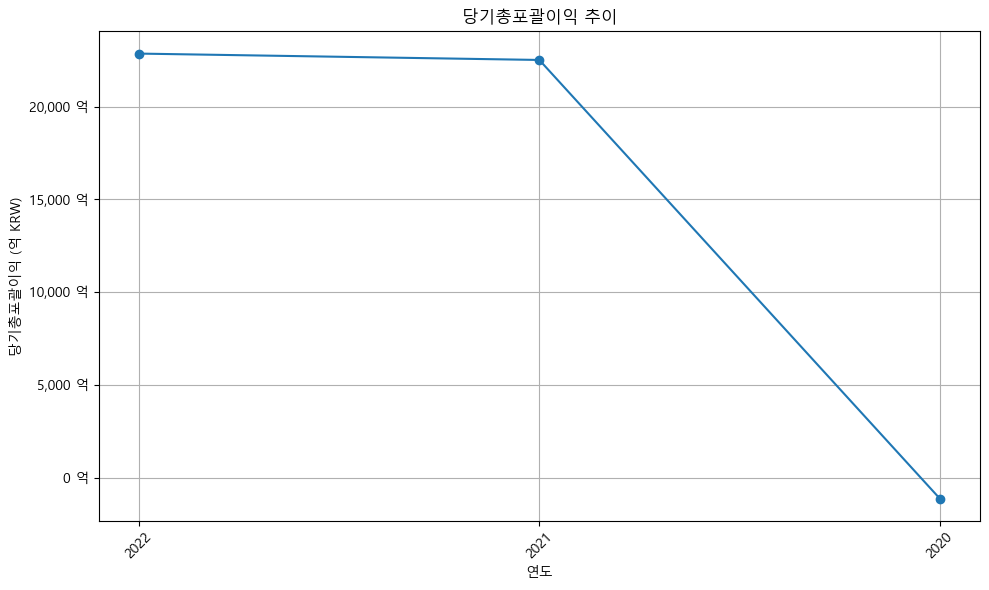

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# 주어진 데이터
data = {
    'label_ko': ['당기총포괄이익'],
    '2022': [2285648151626.0],
    '2021': [2251334008996.0],
    '2020': [-113193868454.0]
}

# 데이터 프레임 생성
df = pd.DataFrame(data)

# 시각화
plt.figure(figsize=(10, 6))
plt.plot(df.columns[1:], df.iloc[0, 1:], marker='o', linestyle='-')
plt.title('당기총포괄이익 추이')
plt.xlabel('연도')
plt.ylabel('당기총포괄이익 (억 KRW)')  # y축 라벨 수정
plt.grid(True)
plt.xticks(rotation=45)

# y축에 억 원 단위를 추가하고, 숫자를 억 원으로 변환하여 표기하도록 설정
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f} 억'.format(x / 10**8)))

plt.tight_layout()
plt.show()
